# DT 분류 모델

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 데이터 불러오기
wine = load_wine()
X = wine.data
y = wine.target

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# DT 모델은 스케일러의 영향을 거의 받지않음
# 실제로 테스트시 Accuracy 결과는 같음
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# DT 모델 생성 부여된 파라미터는 기본값임
# criterion 은 지니불순도, 엔트로피 두개로 나뉘어짐
# 클래스의 크기가 크게 차이나는경우 (객수가 균등하지않을경우) 는 엔트로피가 좋음
model = DecisionTreeClassifier(
    criterion="gini", max_depth=5, min_samples_split=2, min_samples_leaf=1
)

# 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9722222222222222


## GridSearch 로 파라미터 최적화

In [2]:
from sklearn.model_selection import GridSearchCV

# 파라미터 그리드 설정
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5],
}

# GridSearch 를 사용하여 파라미터 탐색
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 최적 파라미터 확인
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# 최적 모델로 예측하기
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("accuracy:", accuracy)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
accuracy: 0.9444444444444444


## iris 데이터로 DT 분류모델 분석

In [4]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeClassifier(
    criterion="gini",
    splitter="best",
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy : {accuracy}")

accuracy : 1.0


## GridSearch 적용

best parameters : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}
accuracy : 1.0


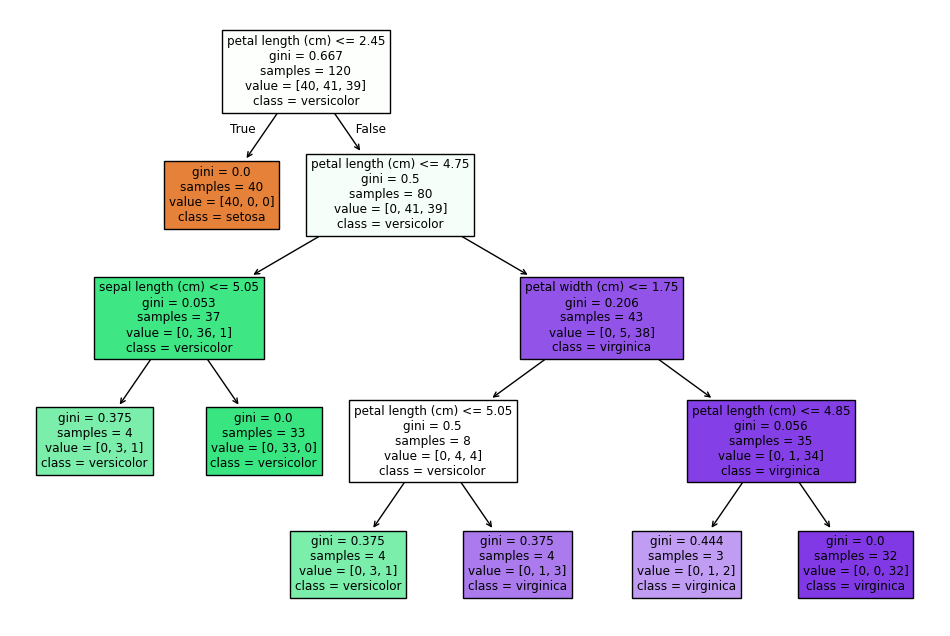

In [5]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5],
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"best parameters : {best_params}")
best_model = grid_search.best_estimator_
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy : {accuracy}")

# 시각화
plt.figure(figsize=(12, 8))
plot_tree(
    best_model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
)
plt.show()

# DT 회귀 모델

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

california_housing = fetch_california_housing(as_frame=True)
X = california_housing.data
y = california_housing.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = DecisionTreeRegressor(max_depth=5, min_samples_split=2, min_samples_leaf=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"mse : {mse}")

mse : 0.5245146178314735


## GridSearch 로 파라미터 최적화

In [7]:
param_grid = {
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5],
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"best params : {best_params}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"mse : {mse}")

best params : {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
mse : 0.45657759859382085
